# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
#### Brief Introduction <br>
> This dataset is a record of how many patients didn't show up after they set an appointment with a doctor. We will investigate if there are any characteristics or conditions that made them don't show up.<br>
##### Columns <br>
PatientId: insignificant<br>
AppointmentID: insignificant<br>
Gender: significant <br>
ScheduledDay: significant <br>
AppointmentDay: significant <br>
Age: significant <br>
Neighbourhood: significant <br>
Scholarship: significant <br>
Hipertension: significant <br>
Diabetes: significant <br>
Alcoholism: significant <br>
Handcap: significant <br>
SMS_received: significant <br>
No-show: significant

### Question(s) for Analysis
 1. Does gender play a significant role in showing up after setting an appointment?
 2. Does age play a significant role in showing up after setting an appointment?
 3. Does scholarship play a significant role in showing up after setting an appointment?
 4. Do Diabetes and Hipertension play a significant role in showing up after setting an appointment?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01  4% |█▍                              | 450kB 18.4MB/s eta 0:00:01    17% |█████▌                          | 1.8MB 12.1MB/s eta 0:00:01    36% |███████████▋                    | 3.8MB 13.1MB/s eta 0:00:01    42% |█████████████▌                  | 4.4MB 13.4MB/s eta 0:00:01    54% |█████████████████▌              | 5.7MB 14.7MB/s eta 0:00:01    60% |███████████████████▌            | 6.4MB 15.2MB/s eta 0:00:01    67% |█████████████████████▌          | 7.0MB 12.4MB/s eta 0:00:01    91% |█████████████████████████████▏  | 9.5MB 12.5MB/s eta 0:00:01    97% |███████████████████████████████ | 10.1MB 11.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.5MB/s eta 0:00:01   21% |███████                         | 2.9MB 28.6MB/s eta 0:00:01    26% |████████▌                       | 3.6MB 26.7MB/s eta 0:00:01    36% |███████████▌                    | 4.8MB 25.8MB/s eta 0:00:01    40% |█████████████            

<a id='wrangling'></a>
## Data Wrangling

### Load the data and view the first 5 rows.

In [2]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Explore the data
print(df.shape)
df.describe()

(110527, 14)


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Check for invaild value in the age column

In [5]:
ch=df.query('Age <1 and Age>0 ')
ch

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [6]:
ch=df.query('Age == -1 ')
ch

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



## Data Cleaning 
 

### Drop unnecessary columns

In [7]:
drop_list = ['PatientId', 'AppointmentID']
df.drop(columns=drop_list, axis=1, inplace=True)

In [8]:
# check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### remove row which contain Age equal (-1)

In [9]:
ind= df.query('Age == -1 ').index[0]
df.drop([ind], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
#check
ch=df.query('Age == -1 ')
ch

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Check for null values

In [11]:
df.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Does gender play a significant role in showing up after setting an appointment?)

In [12]:
gender = df[df['No-show']== 'No']
gender = gender.groupby(['Gender'])['No-show'].count()
F= gender[0]#number of females who showed up
M= gender[1]#number of males who showed up
total = df.groupby(['Gender'])['No-show'].count()
total_F = total[0] # total number of females who showed up and didn't show up
total_M = total[1] # total number of males who showed up and didn't show up
prob_F = F / total_F
prob_M = M / total_M

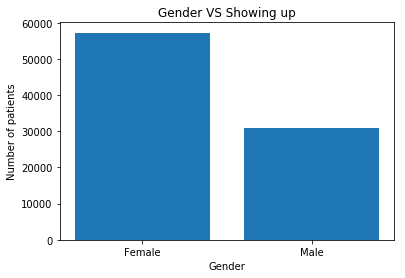

In [24]:
plt.bar(['Female', 'Male'],[F, M] );
plt.title('Gender VS Showing up');
plt.xlabel("Gender");
plt.ylabel("Number of patients");


The number of females who show up after setting an appointment is bigger than males who show up after setting an appointment.

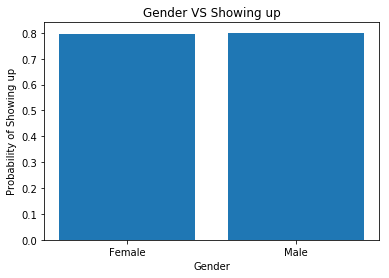

In [25]:
plt.bar(['Female', 'Male'], [prob_F,prob_M]);
plt.title('Gender VS Showing up');
plt.xlabel("Gender");
plt.ylabel("Probability of Showing up");


Probability of showing up depending on gender is approximately the same.

### Research Question 2 (Does age play a significant role in showing up after setting an appointment?)<br>

#### Age distribution of people who show up

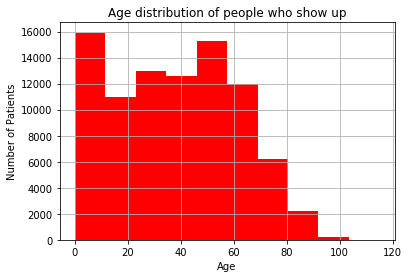

In [26]:
age = df[df['No-show']== 'No']
age['Age'].hist(color = 'red');
plt.title('Age distribution of people who show up');
plt.xlabel("Age");
plt.ylabel("Number of Patients");

Patients whose age from 0 to 10 or from 50 to 60 to show up the most.

####  Create age categories

In [17]:
#insert new column with age categories
new_df = df.copy()
new_df['Age_cat'] = np.where(df['Age'] <= 25, '<=25', 'M' )
new_df['Age_cat'] = np.where((df['Age'] > 25) & (df['Age']<=50) , '<=50' , new_df['Age_cat'] )
new_df['Age_cat'] = np.where((df['Age'] > 50) & (df['Age']<=75) , '<=75' , new_df['Age_cat'])
new_df['Age_cat'] = np.where(df['Age'] > 75 , '>75' , new_df['Age_cat']  )

### Age categories VS Showing up

In [18]:
age = new_df[new_df['No-show']== 'No']
age = age.groupby(['Age_cat'])['No-show'].count()
#F= age[0]#number of females who showed up
#M= age[1]#number of males who showed up
xlab = ['0 to 25', '26 to 50', '51 to 75', '75+']
ylab = []
for i in range(4):
    total = new_df['Age_cat'].value_counts()[i]# total value count without filter
    ylab.append(age[i]/ total)# to get probability
    

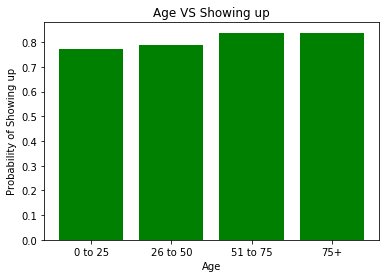

In [27]:
plt.bar(xlab, ylab, color= 'green');
plt.title('Age VS Showing up');
plt.xlabel("Age");
plt.ylabel("Probability of Showing up");

Patients who are 50 and older are more likely to show up.

### Research Question 3  (Does scholarship play a significant role in showing up after setting an appointment?)

In [20]:
scholarship= df[df['No-show']== 'No']
scholarship = scholarship.groupby(['Scholarship'])['No-show'].count()
dnt_hav_scholar= scholarship[0] #number of people who have scholarship and showed up
hav_scholar = scholarship[1]  #number of people who don't have scholarship and showed up
t_dnt_hav_scholar= df['Scholarship'].value_counts()[0]
t_hav_scholar= df['Scholarship'].value_counts()[1]
prob_dnt_hav_scholar = dnt_hav_scholar/ t_dnt_hav_scholar
prob_hav_scholar = hav_scholar / t_hav_scholar

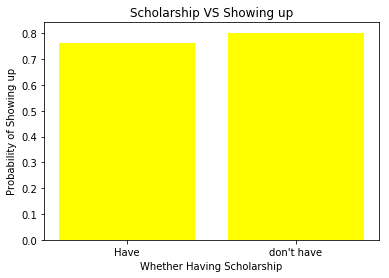

In [28]:
plt.bar(['Have', 'don\'t have'], [prob_hav_scholar,prob_dnt_hav_scholar], color= 'yellow');
plt.title('Scholarship VS Showing up');
plt.xlabel("Whether Having Scholarship");
plt.ylabel("Probability of Showing up");

Patients who don't have scholarships have a higher probability to show up after setting an appointment than those who do have scholarships.

### Research Question 4  (Do Diabetes and Hipertension play a significant role in showing up after setting an appointment?)

In [22]:
hs = df.query('(Hipertension == 1 & Diabetes == 1) | (Hipertension == 0 & Diabetes == 0) ')
hs = hs.groupby(['No-show', 'Hipertension', 'Diabetes'])['Diabetes'].count()
total_no_dh = hs[0]+hs[2] # hs[0] no hipertension, no diabetes and show up
                            # hs[2] no hipertension, no diabetes and didn't show up
total_yes_dh = hs[1] + hs[3]# hs[1] has hipertension, has diabetes and show up
                               # hs[3] has hipertension, has diabetes and didn't show up
prob_no_dh = hs[0] / total_no_dh
prob_yes_dh = hs[1] / total_yes_dh

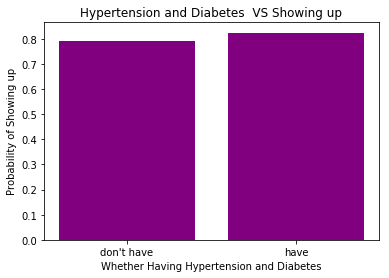

In [29]:
plt.bar(['don\'t have', 'have'], [prob_no_dh, prob_yes_dh], color= 'purple');
plt.title('Hypertension and Diabetes  VS Showing up');
plt.xlabel("Whether Having Hypertension and Diabetes");
plt.ylabel("Probability of Showing up");

Patients who have hypertension and diabetes is more likely to show up after setting an appointment more than patients who don't have hypertension and diabetes.

<a id='conclusions'></a>
## Conclusions

#### With regard to question 1:(Does gender play a significant role in showing up after setting an appointment?)<br>
I found the number of females who show up after setting an appointment is bigger than males who show up after setting an appointment, but as a probability, it is approximately the same.
#### With regard to question 2:(Does age play a significant role in showing up after setting an appointment?)<br>
I found patients whose age from 0 to 10 or from 50 to 60 to show up the most, also I found patients who are 50 and older are more likely to show up.
#### With regard to question 3:(Does scholarship play a significant role in showing up after setting an appointment?)<br>
surprisingly, I found patients who don't have scholarships have a higher probability to show up after setting an appointment than those who do have scholarships.
#### With regard to question 4:(Do Diabetes and Hipertension play a significant role in showing up after setting an appointment?)<br>
I found patients who have hypertension and diabetes is more likely to show up after setting an appointment more than patients who don't have hypertension and diabetes.
### Data limitation <br>
Data missing some key factors that could drastically affect the result like the weather.


In [198]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0